## Пример: Выявление скрытых переменных в наборе данных качества вина

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt
from sklearn import preprocessing

In [3]:
data = pd.read_csv("winequality/winequality/winequality-red.csv", sep = ";")

Данные: постоянная кислотность, летучая кислотность, содержание лимонной кислоты, остаточный сахар, хлориды свободный диоксид серы, общее содержание диокисда серы, плотность, pH, сульфаты, алкоголь, качество

In [4]:
data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
X = data [[u'fixed acidity', u'volatile acidity', u'citric acid',
           u'residual sugar',u'chlorides',u'free sulfur dioxide',
           u'total sulfur dioxide', u'density',u'pH', u'sulphates',
           u'alcohol']]

In [7]:
y = data.quality

In [9]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,shuffle=y)

In [60]:
X_train = pd.DataFrame(preprocessing.MinMaxScaler().fit(X_train).transform(X_train),
                       columns = X.columns)

In [61]:
X_test = pd.DataFrame(preprocessing.MinMaxScaler().fit(X_test).transform(X_test),
                       columns = X.columns)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [63]:
clf = RandomForestClassifier(n_estimators=100, max_depth=11,random_state=0)

In [64]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, random_state=0)

In [65]:
print(clf.feature_importances_)

[0.07219218 0.09740642 0.06686518 0.06829127 0.07605381 0.06620565
 0.10557419 0.08905159 0.06908691 0.11698257 0.17229024]


In [66]:
from sklearn.metrics import f1_score

In [67]:
clf.predict(X_test)

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 5, 5,
       6, 7, 6, 6, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 7, 5, 5, 7, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6,
       7, 5, 7, 5, 7, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       7, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 7, 6, 6, 7, 6, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 5, 7, 5, 7, 5, 7, 6, 6, 7, 6, 6, 7, 6, 7, 6, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 7, 7, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       5, 7, 7, 7, 6, 5, 5, 7, 5, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 5],
      dtype=int64)

In [68]:
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6],
      dtype=int64)

In [69]:
f1_score(y_test, clf.predict(X_test), average='weighted')

0.5999608771169885

In [70]:
# from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

In [71]:
y_test.value_counts()

5    101
6     95
7     33
4      6
8      4
3      1
Name: quality, dtype: int64

In [72]:
print(confusion_matrix(clf.predict(X_test),y_test))

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  3 66 15  0  0]
 [ 0  2 33 63 16  2]
 [ 0  1  2 17 17  2]
 [ 0  0  0  0  0  0]]


In [21]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


При стандартизации данных применяется следующая формула: z = (x-m)/q, где z - новое наблюдаемое значение, x - старое, m - математическое ожидание, а q - стандартное отклонение. Результаты PCA для матрицы данных проще интерпретируются, если столбцы были предварительно отцентрированы по средним арифметическим.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [74]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
1351,7.2,0.620,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
453,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
451,8.4,0.370,0.53,1.8,0.413,9.0,26.0,0.99790,3.06,1.06,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [75]:
model = PCA() #создание экземпляра класса анализа главных компонент

Применение PCA к свободным переменным для поиска возможности свертки их в меньшее количество переменных

In [76]:
results = model.fit(X)

In [77]:
results

PCA()

In [78]:
X.shape

(1599, 11)

In [24]:
Z = results.transform(X) # результат преобразуется в массив для использования вновь созданных данных

In [27]:
Z.shape

(1599, 11)

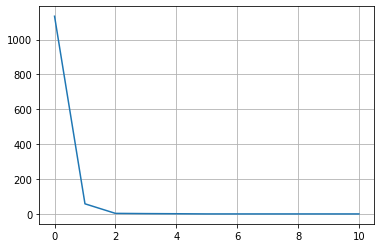

In [28]:
plt.plot(results.explained_variance_)#график каменистой осыпи
plt.grid()
plt.show()

In [79]:
import numpy as np

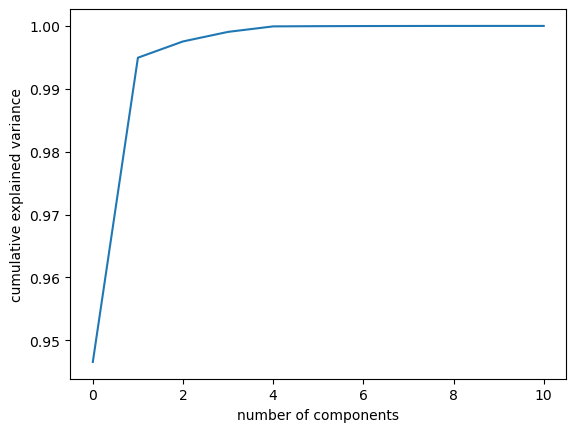

In [80]:
plt.plot(np.cumsum(results.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [82]:
model_ = PCA(n_components=2)

In [83]:
data = model_.fit_transform(X)

In [84]:
data.shape

(1599, 2)

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

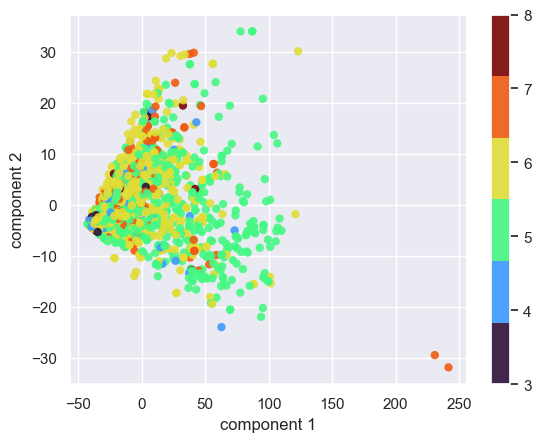

In [86]:
plt.scatter(data[:, 0], data[:, 1],
            c=y, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('turbo', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [87]:
LV=pd.DataFrame(results.components_,columns = list([u'fixed acidity', u'volatile acidity', u'citric acid',
           u'residual sugar',u'chlorides',u'free sulfur dioxide',
           u'total sulfur dioxide', u'density',u'pH', u'sulphates',
           u'alcohol']))

Строки пропущенной таблицы описывают корреляцию признаков качества вина.

In [88]:
LV

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.006132,0.000384,0.000171,0.008649,0.000064,0.218857,0.975678,0.000004,-0.000268,0.000223,-0.006358
1,-0.023899,-0.002010,-0.003035,0.011135,-0.000237,0.975266,-0.218917,-0.000025,0.003272,0.000619,0.014564
2,0.953136,-0.025132,0.073708,0.280914,0.002946,0.020897,-0.001527,0.000776,-0.058631,0.017525,-0.048599
3,-0.265092,0.007274,-0.009832,0.943178,-0.000645,-0.021189,-0.003980,0.000055,0.020578,-0.007199,0.197614
4,0.098148,-0.041157,0.041482,-0.176627,-0.009480,-0.007868,0.010323,-0.000834,0.012622,0.023585,0.977129
5,-0.079312,-0.689242,0.504044,0.005766,0.057016,-0.001060,-0.000614,-0.000467,-0.142002,0.488427,-0.050825
6,0.011142,0.464366,-0.205508,0.002495,0.113948,-0.000093,-0.000230,0.001600,-0.010261,0.853721,0.008250
7,-0.064907,0.338841,0.327123,-0.004134,0.132518,0.002574,-0.001212,-0.004108,-0.859197,-0.132919,0.021779
8,-0.016206,0.428632,0.760466,-0.006931,0.072197,0.001499,-0.000657,0.002839,0.478788,-0.053568,-0.018024
9,0.011189,-0.091587,-0.105489,-0.001486,0.980249,-0.000318,0.000260,0.002033,0.090645,-0.105567,0.010112


Прогнозирование качества вина до применения анализа главных компонент

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

In [90]:
gnb = GaussianNB() #для оценки используется наивный классификатор Байеса с гауссовым распределением

In [91]:
fit = gnb.fit(X,y)#Подгонка данных построение классификатора

In [92]:
pred = fit.predict(X) # прогнозирование для неизвестных данных

In [93]:
print(confusion_matrix(pred,y)) # изучение матрицы несоответствий

[[  3   2   4   0   0   0]
 [  2   8  26  21   1   0]
 [  4  28 456 180  12   0]
 [  1  13 170 324  74   5]
 [  0   1  25 108 110  11]
 [  0   1   0   5   2   2]]


Подсчет правильно классифицированных случаев: после проверки матрицы несоответствий суммируются все элементы диагонали (следа матрицы). Видим, что Наивный классификатор Байеса выдает 897 правильных прогнозов из 1599.

In [94]:
print(confusion_matrix(pred,y).trace())

903


Посмотрим как будет изменяться качество классификации в зависимости от количества компонент

[117]
[117, 120]
[117, 120, 119]
[117, 120, 119, 116]
[117, 120, 119, 116, 125]
[117, 120, 119, 116, 125, 128]
[117, 120, 119, 116, 125, 128, 124]
[117, 120, 119, 116, 125, 128, 124, 131]
[117, 120, 119, 116, 125, 128, 124, 131, 136]
[117, 120, 119, 116, 125, 128, 124, 131, 136, 137]
[117, 120, 119, 116, 125, 128, 124, 131, 136, 137, 139]


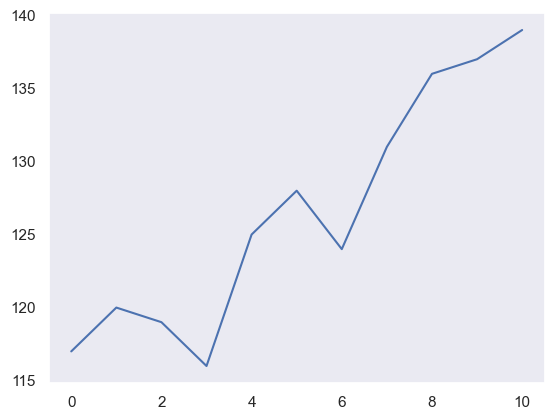

In [98]:
from sklearn.model_selection import train_test_split
predicted_correct = [] #массив будет заполнен правильно спрогнозированными наблюдениями
for i in range (1,12):
    model = PCA(n_components = i)
    results = model.fit(X)
    Z = results.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.15, random_state=42)
    fit = gnb.fit(X_train,y_train)      
    pred = fit.predict(X_test) # прогнозирование с использованием подогнанной модели
    predicted_correct.append(confusion_matrix(pred,y_test).trace())
    print(predicted_correct) #отображение после каждой итерации нового количества 
                            # правильно классифицированных наблюдений
plt.plot(predicted_correct)
plt.grid()
plt.show()


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
fit = gnb.fit(X_train,y_train)
pred = fit.predict(X_test) # прогнозирование с использованием подогнанной модели
confusion_matrix(pred,y_test).trace()

134